<a href="https://colab.research.google.com/github/ydydydydydy/Colab/blob/main/ex02_%EC%86%90%EA%B8%80%EC%94%A8%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자
- 다중분류 딥러닝 모델링을 연습해보자

In [1]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩

In [2]:
# keras에서 제공해주는 손글씨 데이터 불러오기
from tensorflow.keras.datasets import mnist

In [3]:
# 문제데이터와 정답데이터가 나뉘어 제공해주고 있음
# 훈련용, 테스트용 데이터도 나뉘어 제공
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# 데이터 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 훈련데이터 6만장, 테스트 데이터 1만장
# 28*28 픽셀
# 픽셀: 사진의 정보를 가지고있는 단위 (작은 사각형 하나가 1픽셀)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


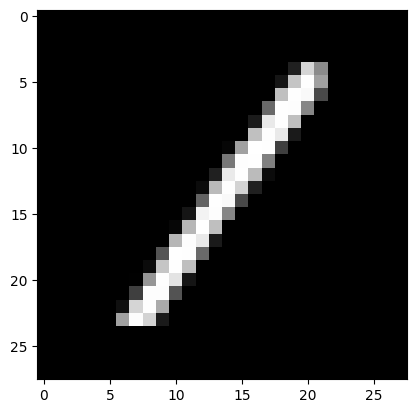

In [5]:
# 사진데이터 확인
plt.imshow(X_train[1003], cmap='gray')
# 흑백사진
# 0 ~ 255 검정색의 정도를 숫자로 가진다

In [6]:
# 정답데이터 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### MLP 모델링
- 입력층의 구조, 출력층의 구조 고려
- 학습능력을 위한 중간층의 깊이 고려
- loss, optimizer 설정


In [7]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Dense: 퍼셉트론을 묶음으로 표현하는 클래스
# InputLayer: 입력층 설정
# Flatten: 2차원의 사진 데이터를 1차원으로 표현하기위한 클래스

In [28]:
# 1. 신경망 설계
# 뼈대
digit_model = Sequential()
# 입력층
digit_model.add(InputLayer(input_shape=(28,28)))  # 28*28의 2차원데이터
# 중간층(은닉층)
digit_model.add(Flatten()) # 2차원의 사진데이터를 1차원으로 변경 (선형모델을 위한 작업)
digit_model.add(Dense(units=16, activation='relu'))
digit_model.add(Dense(units=8, activation='relu'))
digit_model.add(Dense(units=32, activation='relu'))
digit_model.add(Dense(units=16, activation='relu'))
digit_model.add(Dense(units=8, activation='relu'))

# 출력층
digit_model.add(Dense(units= 10, activation='softmax'))
# 다중분류는 클래스의 개수만큼 선형모델이 필요하다
# 활성화함수 : softmax(클래스 개수만큼 확률값이 출력 -> 총합 1로 만들어주는 함수)

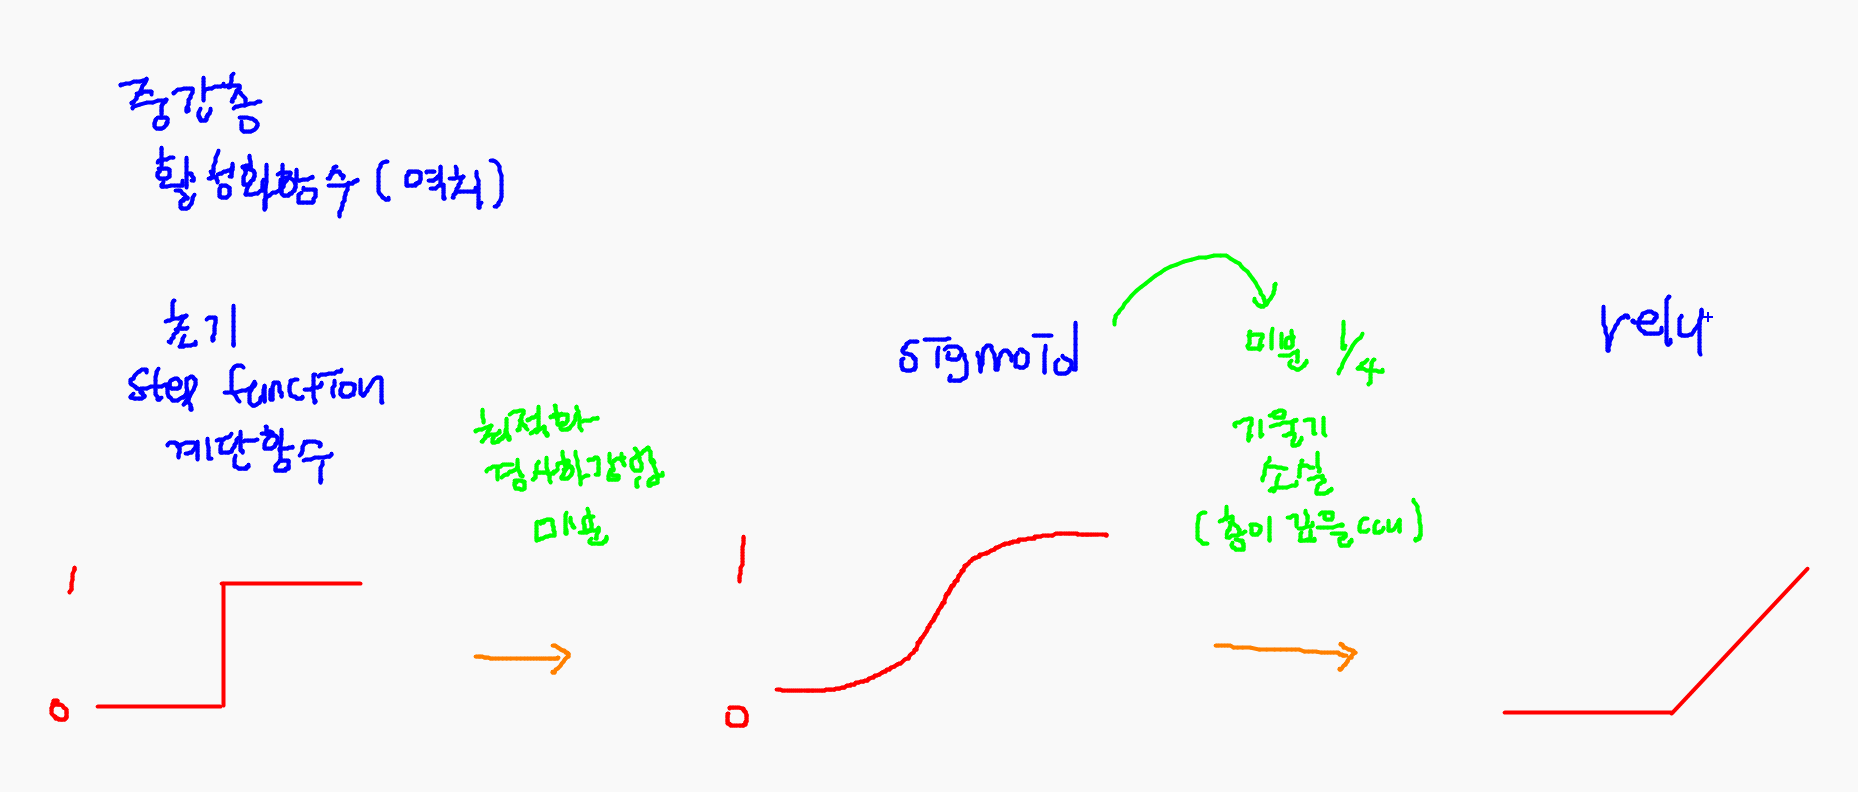

##### 퍼셉트론: 선형모델 + 활성화함수

*활성화함수 (중간층, 출력층에서 사용)
- 중간층: 활성화/비활성화(역치)
   스텝펑션 -> 시그모이드
   (왜? 최적화알고리즘 경사하강법을 적용하기 위해서
   기울기와 역치개념을 가지는 시그모이드를 사용

- 출력층 : 최종 결과의 형태를 결정
(내가 출력하고자하는 형태에 따라 다르게 작성, units /activation)

[출력형태에 따른 unit 의 개수]
- 회귀: units = 1
- 이진분류: units = 1
- 다중분류: units = 클래스의 개수

[출력 형태에 따른 활성화함수의 종류]
- 회귀: linear (항등함수, y = x 선형모델이 예측한 데이터를 그대로 출력) 기본값,적어주지 않아도 괜찮다
- 이진분류: sigmoid (0~1 사이의 확률값을 출력)
- 다중분류: softmax (클래스의 개수만큼 확률값이 출력 -> 각각의 확률값의 총합이 1이 되도록 출력)

[정리]
#### 출력층에서 사용하는 unit 의 개수와 활성화 함수
- 회귀: units = 1, activation = 'linear' (default)
- 이진분류: units = 1, activation = 'sigmoid'
- 다중분류: units = 클래스의 개수, activation = 'softmax'

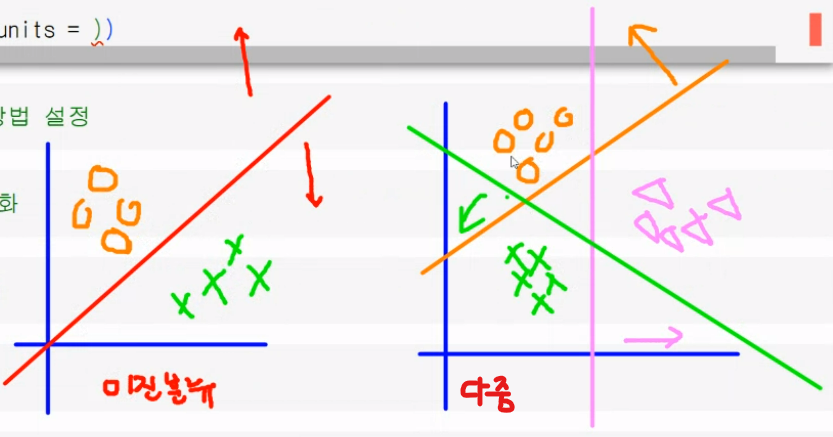

In [9]:
# 2. 모델학습 및 평가 방법 설정
digit_model.compile(loss = 'sparse_categorycal_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])
# loss: 오차 실제값과 예측값의 차이
# 회귀: mean_squared_error
# 이진분류: binary_crossentropy
# 다중분류: categorical_crossentropy

In [15]:
# 3. 모델 학습 및 시각화
h1 = digit_model.fit(X_train,y_train, validation_split=0.2, epochs = 20)

# 문제 발생!
# 오류 확인 -> 정답데이터의 shape가 일치하지 않음!! ( shape 가 다르면 비교 X)
# y_train 확인해보자!

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 2.1128 - accuracy: 0.3931 - val_loss: 1.9161 - val_accuracy: 0.5742
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.7421 - accuracy: 0.6043 - val_loss: 1.5517 - val_accuracy: 0.6589
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.4032 - accuracy: 0.6938 - val_loss: 1.2568 - val_accuracy: 0.7467
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.1669 - accuracy: 0.7607 - val_loss: 1.0594 - val_accuracy: 0.8055
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0066 - accuracy: 0.7913 - val_loss: 0.9295 - val_accuracy: 0.8258
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8920 - accuracy: 0.8066 - val_loss: 0.8227 - val_accuracy: 0.8308
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8023 - accuracy: 0.8230 - val_loss: 0.7870 - val_accuracy:

In [11]:
# 정답데이터의 형태 확인
y_train
# 실제 결과값 (클래스중 하나를 출력-> 범주형)
# 모델링 결과: 10개의 클래스에 대한 각각의 확률값
# 1개와 1-개는 비교가 불가능

# 2가지 해결방법
# [방법1. 정답데이터를 확률로 변경]
# [방법2. loss 함수를 변경 -]
# keras에서 지원하는 자동으로 정답 데이터를 알아서 확률로 계산해주는 방법

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
# [방법1. 정답데이터를 확률값으로 변경하기]
# 모델의 예측값은 확률값으로 출력 / 정답데이터는 범주형데이터 비교(loss) 불가
# 우리가 직접 정답데이터를 범주형에서 확률값으로 변경해주자!
from tensorflow.keras.utils import to_categorical
# 범주형데이터를 확률값으로 변경!
one_hot_y_train = to_categorical(y_train)
one_hot_y_train[0:2]
# 첫번째 데이터 5일 확률 100%, 두번째 데이터는 0일 확률 100%

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
# [방법2. loss합수를 'sparse_categorical_crossentropy'라고 변경해주기]
# 평가를 할 때 알아서 확률값으로 변경해서 계산
# 스스로 내부에서 범주값을 확률값으로 변경하는 작업을 수행 후 loss 값 계산
digit_model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='SGD',
                    metrics=['accuracy'])

# 2번방법을 더 선호

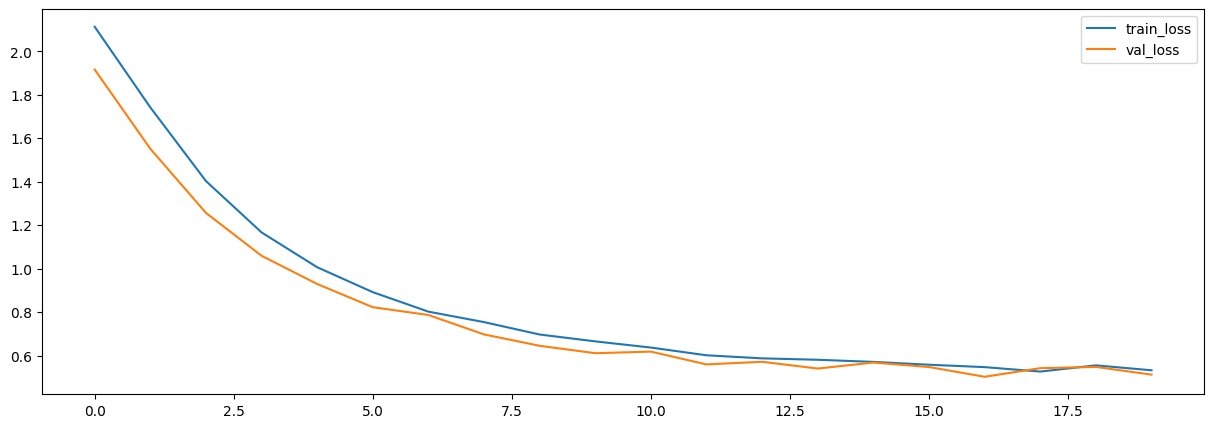

In [16]:
# 학습결과 시각화
plt.figure(figsize=(15,5))
plt.plot(h1.history['loss'],label='train_loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend() # 범례
plt.show()

In [17]:
# 4. 모델 예측 및 평가
digit_model.evaluate(X_test,y_test)
# 정확도 약 0.8361

313/313 [==============================] - 1s 2ms/step - loss: 0.5157 - accuracy: 0.8522


[0.5157346725463867, 0.8521999716758728]

In [18]:
# 파이썬에서 이미지를 처리하는 라이브러리
import PIL.Image as pimg

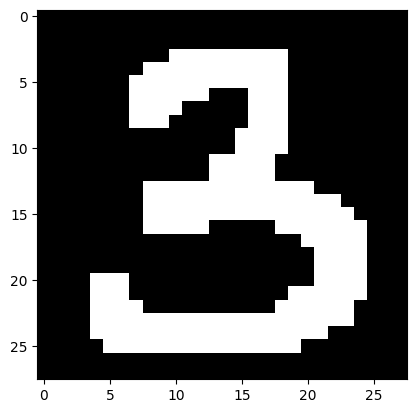

In [20]:
img = pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/손글씨/3.png').convert('L')
plt.imshow(img, cmap = 'gray')

In [21]:
# 전처리
# 이미지타입을 배열로 변환
img = np.array(img)
img.shape

(28, 28)

In [22]:
# 2차원 -> 1차원
test_img = img.reshape(1,28,28,1)
test_img.astype('float32') /255
test_img.shape

(1, 28, 28, 1)

In [23]:
# 예측
digit_model.predict(test_img)
# 결과: 10개의 확률로 출력

1/1 [==============================] - 0s 109ms/step


array([[0.00087257, 0.07460436, 0.26929724, 0.50104976, 0.00099023,
        0.00596435, 0.00056276, 0.04439694, 0.01962147, 0.08264028]],
      dtype=float32)

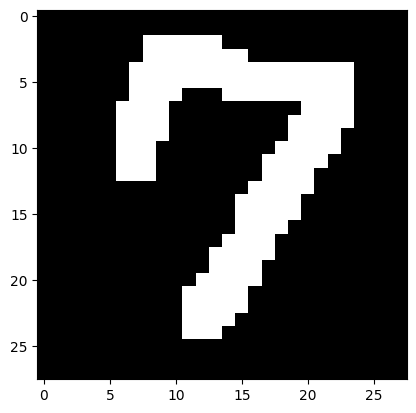

In [24]:
img = pimg.open('/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/손글씨/7.png').convert('L')
plt.imshow(img, cmap = 'gray')

In [25]:
img = np.array(img)
img.shape

(28, 28)

In [26]:
test_img = img.reshape(1,28,28,1)
test_img.astype('float32') /255
test_img.shape

(1, 28, 28, 1)

In [27]:
digit_model.predict(test_img)

1/1 [==============================] - 0s 21ms/step


array([[0.00151591, 0.11247286, 0.05815671, 0.04056529, 0.01285851,
        0.00497619, 0.01201468, 0.7283904 , 0.00340034, 0.02564908]],
      dtype=float32)